In [59]:
%matplotlib inline
#%config InlineBackend.figure_format = 'retina'
#用在Jupyter notebook中具体作用是当你调用matplotlib.pyplot的绘图函数plot()进行绘图的时候，
#或者生成一个figure画布的时候，可以直接在你的python console里面生成图像。

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# # 颜色
# color = sns.color_palette()
# # 数据print精度
# pd.set_option('precision',3) 

# 数据分为训练数据和测试数据，分别保存在train.csv和test_noLabel.csv两个文件中。
#（1）uid：编号 （2）x0-x19：银行用户的具体信息，已脱敏处理 （3）y：银行用户的信用好坏，1表示信用好，0表示信用差。

In [60]:
df1 = pd.read_csv('samples_noLabel.csv',sep = ',')
df1.head(100)
# print(df.shape[0])

,uid,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x11,x12,x13,x14,x15,x16,x17,x18,x19,y
0,10000,0,0,117.996,4,42.070,12.628,1,6.520,1,...,0,1,1,0,0,41.092,21,1,25.972,0
1,10001,1,1,-1.000,0,43.779,49.584,1,0.000,1,...,0,1,1,1,1,1.479,24,4,41.332,0
2,10002,1,1,111.646,0,59.387,26.332,1,216.190,1,...,0,1,1,13,0,1.865,41,1,55.993,0
3,10003,1,1,-1.000,0,48.985,1.785,1,0.000,1,...,0,1,1,1,1,17.328,17,2,42.257,0
4,10004,1,1,119.450,15,82.059,14.133,1,74.622,1,...,0,1,3,10,1,55.612,37,2,44.140,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10095,0,0,114.539,0,32.422,19.048,1,0.829,1,...,0,1,5,1,0,-1.000,41,1,27.521,0
96,10096,1,1,119.294,0,59.806,15.692,1,9.363,1,...,0,1,3,12,1,18.364,17,1,34.124,0
97,10097,1,1,-1.000,0,54.423,55.769,1,0.000,1,...,0,1,1,0,0,4.127,4,2,45.876,0
98,10098,1,0,107.683,0,55.669,33.434,1,225.552,1,...,0,1,3,3,0,18.374,41,1,56.302,1


In [61]:
df2 = pd.read_csv('submit_example.csv',sep = ',')
df2.head(10)
# print(df1.shape[0])

,uid,y
0,8000,1
1,8001,1
2,8002,1
3,8003,1
4,8004,1
5,8005,1
6,8006,1
7,8007,1
8,8008,1
9,8009,1


In [62]:
data_test = pd.read_csv('test_noLabel.csv',sep = ',')
data_test.head(10)
# print(df2.shape[0])

,uid,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19
0,8000,1,10,119.022,0,72.16,33.29,2,13.97,1,...,1,0,1,3,28,8,7.85,18,21,65.0
1,8001,1,11,119.649,0,152.12,65.73,1,0.00,1,...,1,0,1,32,40,5,-1.00,39,26,187.0
2,8002,1,2,108.936,0,89.07,0.00,1,0.00,1,...,1,0,1,23,3,2,-1.00,44,25,62.0
3,8003,1,26,-1.000,5,30.29,26.26,17,0.40,12,...,1,0,1,28,11,22,121.18,81,4,29.0
4,8004,0,0,112.552,15,70.38,38.75,1,0.64,1,...,1,0,1,11,91,0,21.82,49,1,60.0
5,8005,9,14,114.398,9,110.67,63.85,1,0.69,16,...,1,0,1,10,0,18,8.07,123,54,134.0
6,8006,1,2,105.575,9,32.73,29.99,1,48.00,2,...,1,0,1,3,3,3,11.15,5,6,41.0
7,8007,0,0,113.268,7,74.91,36.03,1,10.95,2,...,52,153,1,16,68,0,6.88,27,10,54.0
8,8008,110,75,-1.000,25,58.05,41.20,1,0.00,11,...,1,74,107,3,28,37,24.34,28,1,74.0
9,8009,1,1,104.076,0,65.96,12.11,1,25.54,1,...,1,0,1,1,3,1,0.01,47,2,67.0


In [68]:
data_train = pd.read_csv('train.csv',sep = ',')
data_train.head(10)
# 整个数据都是 整型和浮点型

,uid,x0,x1,x2,x3,x4,x5,x6,x7,x8,...,x11,x12,x13,x14,x15,x16,x17,x18,x19,y
0,0,0,0,120.456,0,85.590,26.72,1,0.000,1,...,0,1,3,5,0,-1.000,307,2,68.000,1
1,1,1,7,118.761,0,41.390,9.05,1,55.150,1,...,0,1,2,7,2,-1.000,33,1,29.000,1
2,2,1,2,-1.000,0,22.300,24.04,1,38.540,2,...,0,1,4,13,3,-1.000,19,2,21.000,1
3,3,1,1,113.899,0,63.206,30.23,1,81.691,1,...,0,1,3,3,0,33.683,39,13,63.408,0
4,4,69,74,-1.000,7,138.130,9.82,1,0.000,22,...,121,1,10,160,7,84.710,67,21,167.000,1
5,5,1,4,120.084,0,76.650,22.79,1,42.750,1,...,0,1,5,57,3,-1.000,72,4,63.000,1
6,6,22,13,118.761,65,34.700,15.10,1,35.840,1,...,3,1,21,9,3,70.150,19,1,26.000,1
7,7,0,0,108.267,0,62.880,0.00,1,19.410,4,...,0,1,5,34,0,-1.000,71,1,44.000,1
8,8,178,147,112.392,5,62.520,21.19,1,0.000,27,...,0,1,6,9,26,20.810,41,9,73.000,0
9,9,1,20,126.770,14,72.850,5.71,177,5.050,1,...,0,1,7,45,9,17.870,102,1,39.000,1


In [109]:
data_train.info()
print("-" * 40)
data_test.info()
# 思路整理 - 查看数据类型
# 目前看来没有缺失值
# 整个数据都是 整型和浮点型
# 下一步：需要去查看各分项 的 数据点分布情况
data_train.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   uid     8000 non-null   int64  
 1   x0      8000 non-null   int64  
 2   x1      8000 non-null   int64  
 3   x2      8000 non-null   float64
 4   x3      8000 non-null   int64  
 5   x4      8000 non-null   float64
 6   x5      8000 non-null   float64
 7   x6      8000 non-null   int64  
 8   x7      8000 non-null   float64
 9   x8      8000 non-null   int64  
 10  x9      8000 non-null   int64  
 11  x10     8000 non-null   int64  
 12  x11     8000 non-null   int64  
 13  x12     8000 non-null   int64  
 14  x13     8000 non-null   int64  
 15  x14     8000 non-null   int64  
 16  x15     8000 non-null   int64  
 17  x16     8000 non-null   float64
 18  x17     8000 non-null   int64  
 19  x18     8000 non-null   int64  
 20  x19     8000 non-null   float64
 21  y       8000 non-null   int64  
dtype

uid    0
x0     0
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
y      0
dtype: int64

In [110]:
data_train.isnull().sum()
# 没有缺失值

uid    0
x0     0
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
y      0
dtype: int64

In [71]:
print(data_train.groupby(['x12'])['y'].count())

x12
0         7
1      7812
2         1
3         1
4         1
       ... 
233       1
235       1
236       1
237       1
238       1
Name: y, Length: 162, dtype: int64


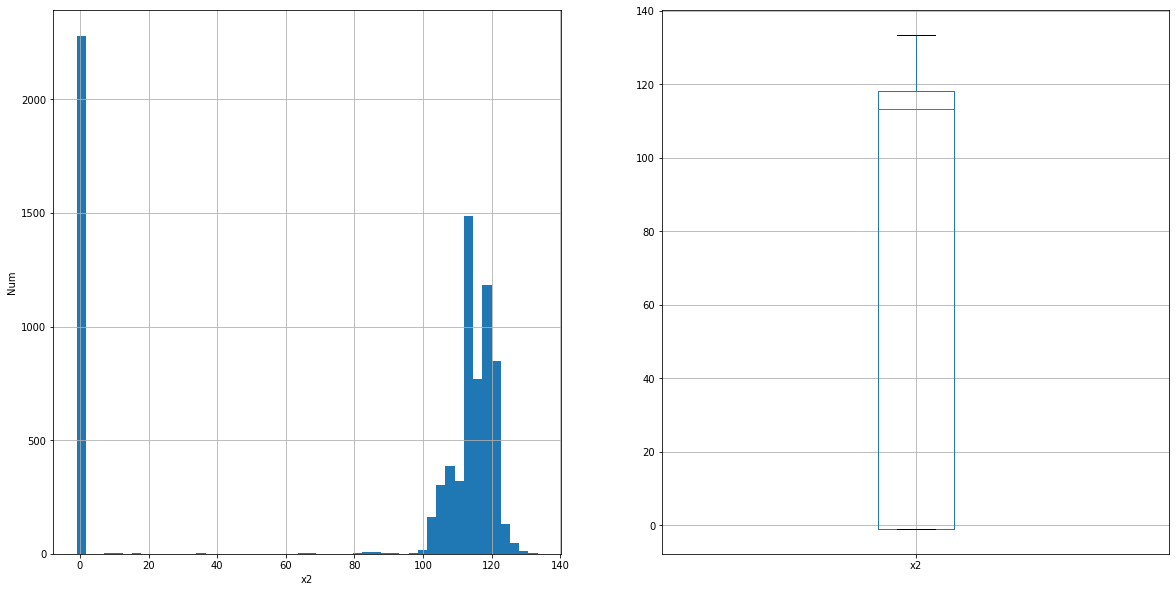

In [79]:
# (1)figure语法说明
# figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True)

# num:图像编号或名称，数字为编号 ，字符串为名称
# figsize:指定figure的宽和高，单位为英寸；
# dpi参数指定绘图对象的分辨率，即每英寸多少个像素，缺省值为80      1英寸等于2.5cm,A4纸是 21*30cm的纸张 
# facecolor:背景颜色
# edgecolor:边框颜色
# frameon:是否显示边框

plt.figure(figsize=(20,10))
plt.subplot(121)
data_train['x2'].hist(bins=50) # bins是指直方图的总个数，个数越多，条形带越紧密。
plt.xlabel('x2')
plt.ylabel('Num')
 
plt.subplot(122)
data_train.boxplot(column='x2',showfliers=False) # boxplot 箱型图，showfliers 是否显示异常值
plt.show()
# 箱型图帮我们展示了 x2 数据的中位数大概在 110， 上四分位 接近120，下四分位 在 0左右

In [106]:
print(data_train['x0'].describe())
#count(行数)，mean(平均值)，std(标准差)，min(最小值），25%(第一四分位数)，50%(第二四分位数)，75%(第三四分位数)，max(最大值)。

count    8000.000
mean       18.389
std        44.353
min         0.000
25%         0.000
50%         1.000
75%         1.000
max       237.000
Name: x0, dtype: float64


In [107]:
print(data_train['x1'].describe())

count    8000.000
mean       26.520
std        67.045
min         0.000
25%         0.000
50%         1.000
75%        16.000
max       473.000
Name: x1, dtype: float64


In [87]:
print(data_train['x2'].describe())

count    8000.000
mean       81.678
std        52.566
min        -1.000
25%        -1.000
50%       113.147
75%       118.011
max       133.398
Name: x2, dtype: float64


In [88]:
print(data_train['x3'].describe())

count    8000.000
mean       13.157
std        26.059
min         0.000
25%         0.000
50%         0.000
75%        14.000
max       200.000
Name: x3, dtype: float64


In [89]:
print(data_train['x4'].describe())

count    8000.000
mean       84.015
std        94.015
min         5.520
25%        43.804
50%        66.345
75%        99.855
max      2334.000
Name: x4, dtype: float64


In [90]:
print(data_train['x5'].describe())

count    8000.000
mean       25.345
std        18.864
min        -1.000
25%        11.571
50%        21.597
75%        35.237
max       100.000
Name: x5, dtype: float64


In [91]:
print(data_train['x6'].describe())

count    8000.000
mean        6.249
std        20.540
min         0.000
25%         1.000
50%         1.000
75%         1.000
max       186.000
Name: x6, dtype: float64


In [92]:
print(data_train['x7'].describe())

count    8000.000
mean       43.785
std        90.348
min        -1.000
25%         0.210
50%        13.495
75%        47.459
max      2480.620
Name: x7, dtype: float64


In [93]:
print(data_train['x8'].describe())

count    8000.000
mean        5.868
std        15.593
min         0.000
25%         1.000
50%         1.000
75%         3.000
max       169.000
Name: x8, dtype: float64


In [94]:
print(data_train['x9'].describe())

count    8000.000
mean       27.285
std        36.922
min         0.000
25%         3.000
50%        13.000
75%        36.000
max       242.000
Name: x9, dtype: float64


In [95]:
print(data_train['x10'].describe())

count    8000.000
mean       10.362
std        38.554
min         0.000
25%         1.000
50%         1.000
75%         1.000
max       332.000
Name: x10, dtype: float64


In [96]:
print(data_train['x11'].describe())

count    8000.000
mean        9.866
std        33.464
min         0.000
25%         0.000
50%         0.000
75%         0.000
max       210.000
Name: x11, dtype: float64


In [97]:
print(data_train['x12'].describe())

count    8000.000
mean        3.548
std        19.880
min         0.000
25%         1.000
50%         1.000
75%         1.000
max       238.000
Name: x12, dtype: float64


In [99]:
print(data_train['x13'].describe())

count    8000.000
mean       11.209
std        15.252
min         0.000
25%         3.000
50%         6.000
75%        13.000
max       159.000
Name: x13, dtype: float64


In [100]:
print(data_train['x14'].describe())

count    8000.000
mean       24.622
std        35.966
min         0.000
25%         2.000
50%         9.000
75%        31.000
max       229.000
Name: x14, dtype: float64


In [101]:
print(data_train['x15'].describe())

count    8000.000
mean        6.587
std        14.525
min         0.000
25%         0.000
50%         1.000
75%         7.000
max       148.000
Name: x15, dtype: float64


In [102]:
print(data_train['x16'].describe())

count    8000.000
mean       43.056
std        55.456
min        -1.000
25%        -0.984
50%        18.116
75%        70.177
max       279.700
Name: x16, dtype: float64


In [103]:
print(data_train['x17'].describe())

count    8000.000
mean       73.186
std        75.767
min         0.000
25%        25.000
50%        47.500
75%        92.000
max       482.000
Name: x17, dtype: float64


In [104]:
print(data_train['x18'].describe())

count    8000.000
mean        7.465
std        13.495
min         0.000
25%         1.000
50%         3.000
75%         8.000
max       140.000
Name: x18, dtype: float64


In [105]:
print(data_train['x19'].describe())

count    8000.000
mean       66.414
std        49.606
min         0.000
25%        32.000
50%        53.000
75%        87.000
max       322.000
Name: x19, dtype: float64
